# COMP 135 Fall 2019: HW1 STARTER

# Setup comp135_env package imports

In [4]:
import os
import numpy as np
import sklearn.neighbors
import sklearn.tree

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# This makes autoreload local libraries automatic:
%load_ext autoreload
%autoreload 2

# Setup student-defined imports

In [3]:
from LeastSquaresLinearRegression import LeastSquaresLinearRegressor

In [4]:
from evaluate_perf_metrics import (
    calc_perf_metric__absolute_error, calc_perf_metric__squared_error,
    calc_perf_metrics_for_regressor_on_dataset)

# Load dataset

In [5]:
## TODO load all data (train/valid/test) into x_tr_NF, x_va_NF, x_te_NF, ...

In [6]:
y_tr_N = np.loadtxt('data_abalone/y_train.csv', delimiter=',', skiprows=1)

In [7]:
x_tr_NF = np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1)

# 1 : Abalone histograms of response variable 'rings'

#### 1a: Produce one figure with three subplots, showing histograms of $y$ from train/valid/test

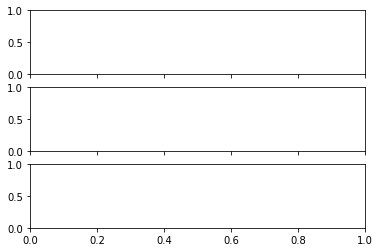

In [5]:
fig_h, axes_arr = plt.subplots(nrows=3, ncols=1, sharex=True)

## TODO plot histograms on the axes
## e.g. sns.distplot(y_tr_N, kde=False, rug=True, ax=axes_arr[0]);


#### 1b: Describe the **train** distribution. Unimodal or multimodal? What shape? Are there noticeable outliers?

**TODO ANSWER HERE**

#### 1c: Quantify train's descriptive statistics. 

In [9]:
### TODO CODE HERE

# 2 : Scatterplots of 'rings' vs 'diam' and 'rings' vs 'shucked'

#### **2a:** Create figure with two subplots: scatter plot of `diam_mm` vs `rings` and scatter of `shucked_weight_g` vs `rings`.

In [10]:
## TODO CODE HERE

#### **2b:** Describe the trends you between diameter and rings in a few sentences.

**TODO ANSWER HERE**

#### 2c: Describe the trends you see between shucked weight and rings.


**TODO ANSWER HERE**

# Setup code for 3

In [11]:
## Dummy class to perform "always guess training mean" prediction
class MeanPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.mean(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [12]:
## Dummy class to perform "always guess training median" prediction
class MedianPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.median(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [13]:
mean_value_predictor = MeanPredictor()
## TODO fit the predictor, like mean_value_predictor.fit(x_tr_N2, y_tr_N)

## TODO evaluate predictions on train, valid, and test

In [14]:
median_value_predictor = MedianPredictor()
## TODO fit the predictor
## TODO evaluate predictions on train, valid, and test

# 3 : Results Table for Abalone MSE

#### Make a table of the **mean-squared-error** for each of the MeanPredictor and MedianPredictor predictors when evaluated on all 3 dataset splits (training, validation, and test).


**Mean Squared Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |        |         |        
| valid |        |         |
| test  |        |         |


# Model fitting code for 4

In [15]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# TODO fit and evaluate

In [16]:
linear_regressor_8feats = LeastSquaresLinearRegressor()
# TODO fit and evaluate

# 4 : Results Table for Mean Squared Error on Abalone

### **4a** and **4b**: Add results to the table

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats)
| ----- | ----------- | ------------ | --------------------- | ---------------------
| train |       
| valid |
| test  |

### **4c:** Does using more features seem worthwhile? Do you think the improvement on the test data is significant? Why or why not?


# 5 : Model selection for K-Nearest Neighbor Regressor

In [17]:
param_name = 'n_neighbors'
param_list = [1, 3, 5, 7, 11, 21, 41, 61, 81, 101, 201, 401, 801] # TODO ADD N
# Keep only values below total training size
param_list = [p for p in param_list if p <= param_list[-1]]

In [18]:
train_mse_list = []
valid_mse_list = []
test_mse_list = []
for n_neighbors in param_list:
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=n_neighbors,
        metric='euclidean',
        algorithm='brute')
    # TODO fit and predict and track performance metric values in the lists

#### **5a:** Make a line plot for mean-squared-error (MSE) vs $K$ on the validation set

In [19]:
# TODO

#### **5b:** Which value do you recommend?

In [20]:
# TODO

#### **5c:** Cumulative results table with K-Nearest Neighbor

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats) | k-NN (8 feats)  |
| ----- | ----------- | ------------ | --------------------- | --------------------- | ----- |
| train |   
| valid | 
| test  |

# <a name="problem-1-g"> 6: Analyzing Residuals </a>

Bonus points possible. Not a required question. Feel free to skip

In [21]:
# TODO compute the predicted y values for linear regr and kNN

#### **6a:** Plot scatters of y vs yhat for linear regression and the best k-NN regressor


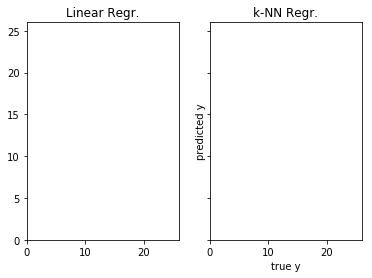

In [22]:
fig_h, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plt.xlim([0, 26]); plt.ylim([0, 26]);

# ax_grid[0].plot(y_va_N, linear_yhat_va_N, 'k.', alpha=0.2);
ax_grid[0].set_title('Linear Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

# ax_grid[1].plot(y_va_N, knn_yhat_va_N, 'k.', alpha=0.2);
plt.title('k-NN Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

#### **6b:** What kinds of systematic errors does each method make? What should be done about these?


TODO ANSWER HERE